In [3]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('Border_Crossing.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391043 entries, 0 to 391042
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Port Name  391043 non-null  object 
 1   State      391043 non-null  object 
 2   Port Code  391043 non-null  int64  
 3   Border     391043 non-null  object 
 4   Date       391043 non-null  object 
 5   Measure    391043 non-null  object 
 6   Value      391043 non-null  int64  
 7   Latitude   391043 non-null  float64
 8   Longitude  391043 non-null  float64
 9   Point      391043 non-null  object 
 10  Month      391043 non-null  object 
 11  Year       391043 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 35.8+ MB


In [6]:
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point,Month,Year
0,Roma,Texas,2310,US-Mexico Border,Dec 2023,Buses,46,26.404,-99.019,POINT (-99.018981 26.403928),Dec,2023
1,Del Rio,Texas,2302,US-Mexico Border,Dec 2023,Trucks,6552,29.327,-100.928,POINT (-100.927612 29.326784),Dec,2023
2,Roma,Texas,2310,US-Mexico Border,Nov 2023,Trucks,3753,26.404,-99.019,POINT (-99.018981 26.403928),Nov,2023
3,Douglas,Arizona,2601,US-Mexico Border,Oct 2023,Buses,13,31.334,-109.560,POINT (-109.560344 31.334043),Oct,2023
4,Beecher Falls,Vermont,206,US-Canada Border,Aug 2023,Trucks,422,45.013,-71.505,POINT (-71.505309 45.013411),Aug,2023


In [12]:
for col in df.columns:
    print(col, df[col].nunique())

Port Name 116
State 14
Port Code 117
Border 2
Date 339
Measure 12
Value 59999
Latitude 71
Longitude 116
Point 116
Month 12
Year 29


In [14]:
grouped_df = df.groupby(['Port Name', 'Border'])['Value'].sum().reset_index()
grouped_df

,Port Name,Border,Value
0,Alcan,US-Canada Border,4787856
1,Alexandria Bay,US-Canada Border,69431055
2,Algonac,US-Canada Border,317499
3,Ambrose,US-Canada Border,219310
4,Anacortes,US-Canada Border,1690849
...,...,...,...
111,Whitetail,US-Canada Border,160092
112,Whitlash,US-Canada Border,73287
113,Wildhorse,US-Canada Border,916403
114,Willow Creek,US-Canada Border,174327


In [15]:
grouped_df['Rank'] = grouped_df.groupby('Border')['Value'].rank(ascending=False).astype(int)
grouped_df

,Port Name,Border,Value,Rank
0,Alcan,US-Canada Border,4787856,41
1,Alexandria Bay,US-Canada Border,69431055,10
2,Algonac,US-Canada Border,317499,80
3,Ambrose,US-Canada Border,219310,83
4,Anacortes,US-Canada Border,1690849,59
...,...,...,...,...
111,Whitetail,US-Canada Border,160092,87
112,Whitlash,US-Canada Border,73287,88
113,Wildhorse,US-Canada Border,916403,68
114,Willow Creek,US-Canada Border,174327,86


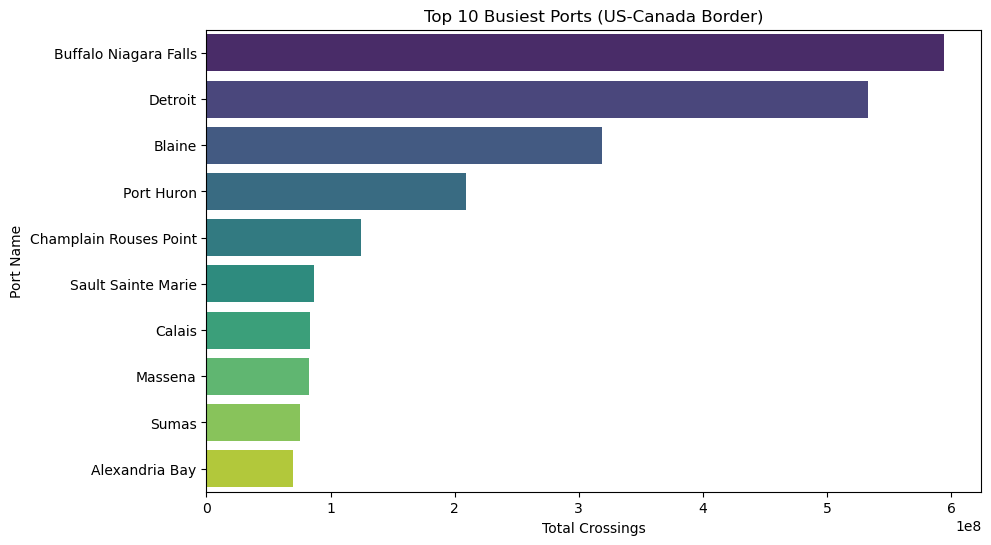

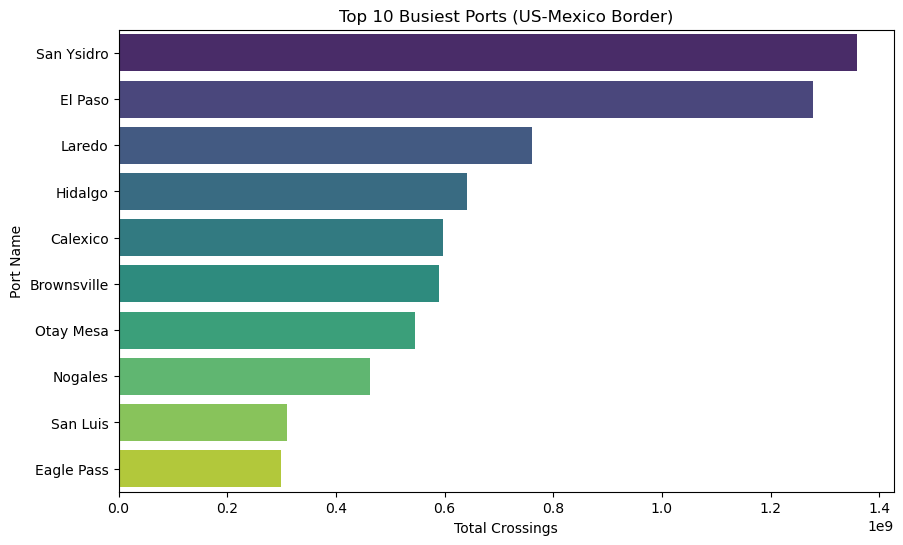

In [16]:
for border, data in grouped_df.groupby('Border'):
    top_ports = data.nlargest(10, 'Value')
    plt.figure(figsize=(10, 6))
    seaborn.barplot(x='Value', y='Port Name', data=top_ports, palette='viridis')
    plt.title(f'Top 10 Busiest Ports ({border})')
    plt.xlabel('Total Crossings')
    plt.ylabel('Port Name')
    plt.show()

In [17]:
weight_df = df.groupby(['Border', 'Measure'])['Value'].sum().reset_index()
weight_df

,Border,Measure,Value
0,US-Canada Border,Bus Passengers,77559509
1,US-Canada Border,Buses,3251699
2,US-Canada Border,Pedestrians,13961076
3,US-Canada Border,Personal Vehicle Passengers,1672846695
4,US-Canada Border,Personal Vehicles,807597971
5,US-Canada Border,Rail Containers Empty,16225966
6,US-Canada Border,Rail Containers Loaded,38997501
7,US-Canada Border,Train Passengers,6582841
8,US-Canada Border,Trains,803778
9,US-Canada Border,Truck Containers Empty,31338007


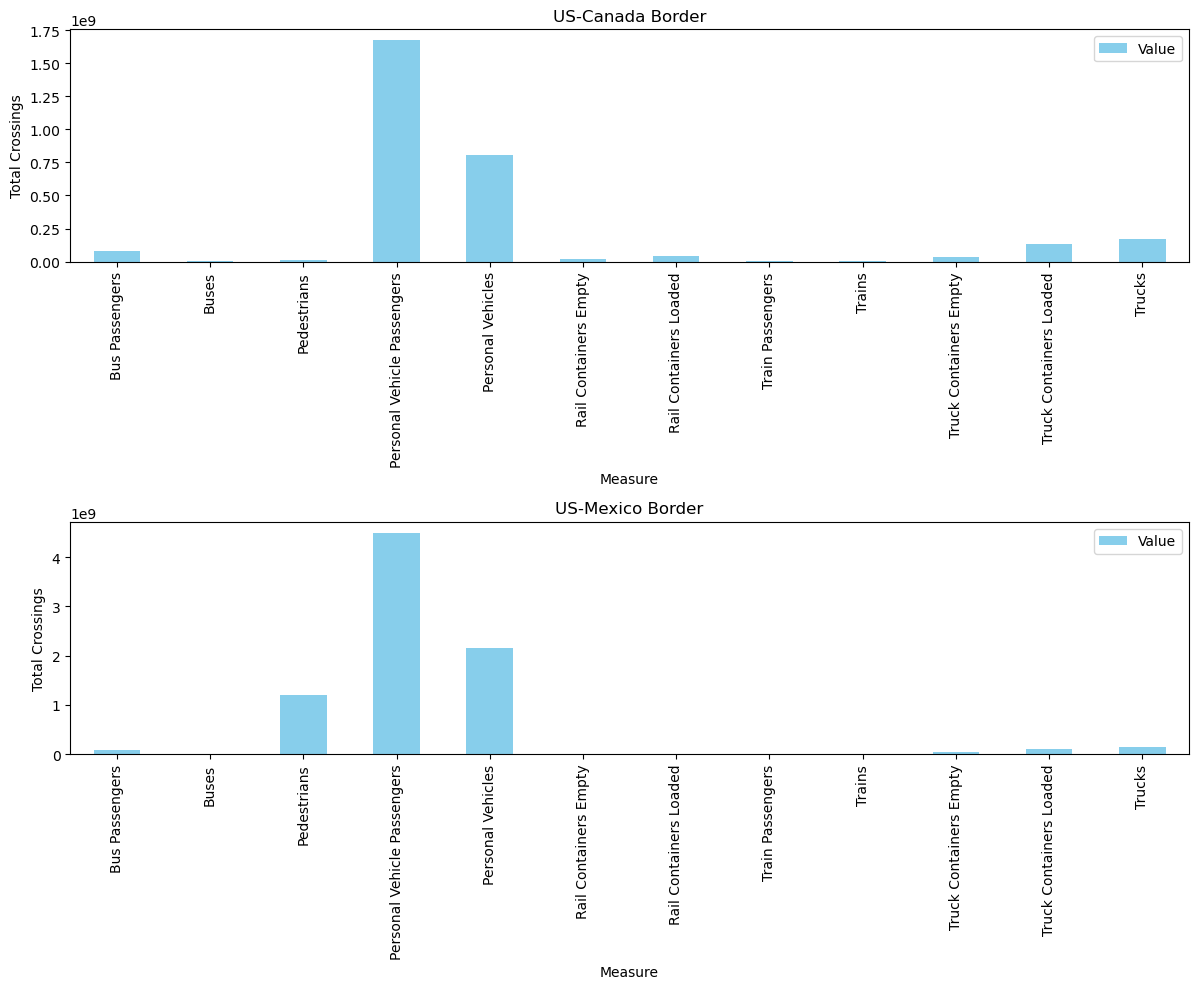

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
for i, (border, weight_df) in enumerate(weight_df.groupby('Border')):
    ax = axes[i]
    ax.set_title(border)
    weight_df.plot(kind='bar', x='Measure', y='Value', ax=ax, color='skyblue')
    ax.set_xlabel('Measure')
    ax.set_ylabel('Total Crossings')

plt.tight_layout()
plt.show()

In [24]:
std_dev_df = df.groupby(['Border', 'Measure'])['Value'].std().reset_index()
std_dev_df

,Border,Measure,Value
0,US-Canada Border,Bus Passengers,13666.948525
1,US-Canada Border,Buses,530.342636
2,US-Canada Border,Pedestrians,4499.553229
3,US-Canada Border,Personal Vehicle Passengers,179189.317430
4,US-Canada Border,Personal Vehicles,82053.126867
5,US-Canada Border,Rail Containers Empty,2297.689731
6,US-Canada Border,Rail Containers Loaded,5376.641377
7,US-Canada Border,Train Passengers,1371.560135
8,US-Canada Border,Trains,77.932322
9,US-Canada Border,Truck Containers Empty,3577.904056


In [30]:
#assigning weights for each measure 
#weights are assigned according to the volume of the inbound crossing traffic overall in each border
weights = {
    'Bus Passengers': 1,
    'Buses': 1,
    'Pedestrians': 1,
    'Personal Vehicle Passengers': 3,
    'Personal Vehicles': 3,
    'Rail Containers Empty': 0.5,
    'Rail Containers Loaded': 0.5,
    'Train Passengers': 0.2,
    'Trains': 0.2,
    'Truck Containers Empty': 1.5,
    'Truck Containers Loaded': 1.5,
    'Trucks': 1.5
}

In [32]:
# Calculate weighted sum
df['Weighted Value'] = df['Measure'].map(weights) * df['Value']

# Rank the borders based on weighted sum
ranked_df = df.groupby('Border')['Weighted Value'].sum().reset_index()
ranked_df['Rank'] = ranked_df['Weighted Value'].rank(ascending=False).astype(int)

# Display the ranked borders
print(ranked_df.sort_values(by='Rank'))

             Border  Weighted Value  Rank
1  US-Mexico Border    2.169256e+10     1
0  US-Canada Border    8.062244e+09     2


In [34]:
df['Weighted Value'] = df['Measure'].map(weights) * df['Value']
ranked_df = df.groupby(['Border', 'Port Name'])['Weighted Value'].sum().reset_index()
ranked_df['Rank'] = ranked_df.groupby('Border')['Weighted Value'].rank(ascending=False).astype(int)

In [35]:
overall_ranked_df = ranked_df.groupby('Port Name')['Weighted Value'].sum().reset_index()
overall_ranked_df['Overall Rank'] = overall_ranked_df['Weighted Value'].rank(ascending=False).astype(int)

In [36]:
print("Ranked Ports within Each Border:")
print(ranked_df.sort_values(by=['Border', 'Rank']))

Ranked Ports within Each Border:
               Border               Port Name  Weighted Value  Rank
12   US-Canada Border   Buffalo Niagara Falls    1.620539e+09     1
21   US-Canada Border                 Detroit    1.428906e+09     2
9    US-Canada Border                  Blaine    8.922849e+08     3
61   US-Canada Border              Port Huron    5.264699e+08     4
16   US-Canada Border  Champlain Rouses Point    3.236586e+08     5
..                ...                     ...             ...   ...
115  US-Mexico Border                  Ysleta    1.058230e+08    24
102  US-Mexico Border                    Naco    9.146554e+07    25
94   US-Mexico Border     Cross Border Xpress    1.063436e+07    26
112  US-Mexico Border                  Sasabe    7.901891e+06    27
89   US-Mexico Border               Boquillas    9.877100e+04    28

[116 rows x 4 columns]


In [37]:
print("\nOverall Ranked Ports:")
print(overall_ranked_df.sort_values(by='Overall Rank'))


Overall Ranked Ports:
                 Port Name  Weighted Value  Overall Rank
91              San Ysidro    3.618944e+09             1
34                 El Paso    3.397528e+09             2
52                  Laredo    1.836948e+09             3
44                 Hidalgo    1.734283e+09             4
15   Buffalo Niagara Falls    1.620539e+09             5
..                     ...             ...           ...
114           Willow Creek    5.219260e+05           112
39           Friday Harbor    4.899400e+05           113
111              Whitetail    4.742890e+05           114
112               Whitlash    1.979505e+05           115
11               Boquillas    9.877100e+04           116

[116 rows x 3 columns]
